In [17]:
# from IPython.display import display
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="whitegrid")

### Taking Stock Values for 3 different companies  

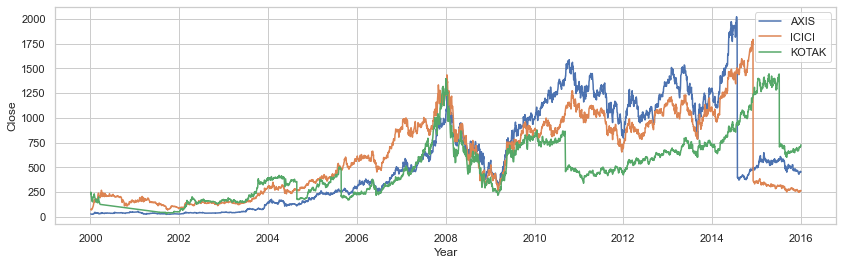

In [18]:
import matplotlib.pyplot as plt
from datetime import datetime

def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

axisDF = pd.read_csv('AXISBANK.csv', parse_dates=[0], index_col='Date', date_parser=parser)
iciciDF = pd.read_csv('ICICIBANK.csv', parse_dates=[0], index_col='Date', date_parser=parser)
kotakDF = pd.read_csv('KOTAKBANK.csv', parse_dates=[0], index_col='Date', date_parser=parser)

start_date = datetime(2000,1,1)
end_date = datetime(2016,1,1)

axisDF2 = axisDF[start_date:end_date]
iciciDF2 = iciciDF[start_date:end_date]
kotakDF2 = kotakDF[start_date:end_date]

plt.figure(figsize=(14,4))
plt.plot(axisDF2['Close'], label='AXIS')
plt.plot(iciciDF2['Close'], label='ICICI')
plt.plot(kotakDF2['Close'], label='KOTAK')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.legend()

### Splitting Data into Train & Test for all 3 companies

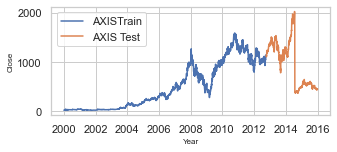

In [19]:
from sklearn.model_selection import train_test_split

axis_train = axisDF2['Close'][:int(0.8*len(axisDF2))]
axis_test = axisDF2['Close'][int(0.8*len(axisDF2)):]

plt.figure(figsize=(5, 2))
plt.plot(axis_train.index, axis_train, label='AXISTrain')
plt.plot(axis_test.index, axis_test, label='AXIS Test')

plt.xlabel('Year', fontsize=8)
plt.ylabel('Close', fontsize=8)
plt.legend()
plt.show()

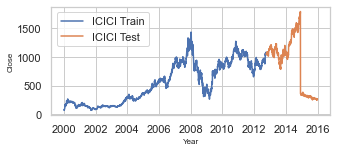

In [20]:
icici_train = iciciDF2['Close'][:int(0.8*len(iciciDF2))]
icici_test = iciciDF2['Close'][int(0.8*len(iciciDF2)):]

plt.figure(figsize=(5, 2))
plt.plot(icici_train.index, icici_train, label='ICICI Train')
plt.plot(icici_test.index, icici_test, label='ICICI Test')

plt.xlabel('Year', fontsize=8)
plt.ylabel('Close', fontsize=8)
plt.legend()
plt.show()

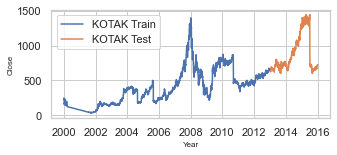

In [21]:
kotak_train = kotakDF2['Close'][:int(0.8*len(kotakDF2))]
kotak_test = kotakDF2['Close'][int(0.8*len(kotakDF2)):]

plt.figure(figsize=(5, 2))
plt.plot(kotak_train.index, kotak_train, label='KOTAK Train')
plt.plot(kotak_test.index, kotak_test, label='KOTAK Test')

plt.xlabel('Year', fontsize=8)
plt.ylabel('Close', fontsize=8)
plt.legend()
plt.show()

### 1. ARMA Model

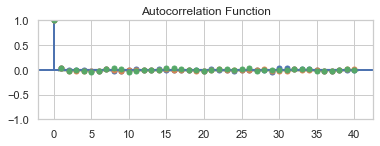

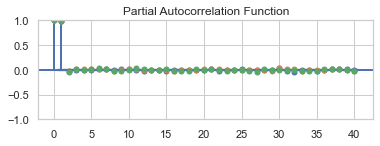

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#finding q
plt.subplot(2, 1, 1)
plot_acf(axisDF2['Close'].diff().dropna(), lags=40, ax=plt.gca())
plot_acf(iciciDF2['Close'].diff().dropna(), lags=40, ax=plt.gca())
plot_acf(kotakDF2['Close'].diff().dropna(), lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')
plt.show()

#finding p
plt.subplot(2, 1, 1)
plot_pacf(axisDF2['Close'], lags=40, ax=plt.gca())
plot_pacf(iciciDF2['Close'], lags=40, ax=plt.gca())
plot_pacf(kotakDF2['Close'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt

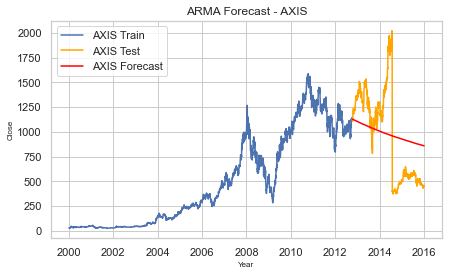

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt

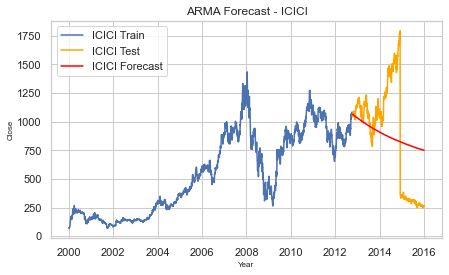

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt

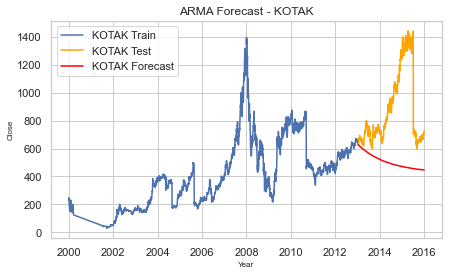

In [23]:
from statsmodels.tsa.arima.model import ARIMA

def forecast_arma(train, test, p, d, q, title):
    
    arma_model = ARIMA(train, order=(p, d, q))
    arma_fit = arma_model.fit()

    next_steps = len(test)
    arma_forecast = arma_fit.forecast(steps=next_steps)

    plt.figure(figsize=(7, 4))
    plt.plot(train.index, train, label=f'{title} Train')
    plt.plot(test.index, test, label=f'{title} Test', color='orange')
    plt.plot(test.index, arma_forecast, label=f'{title} Forecast', color='red')
    
    plt.xlabel('Year', fontsize=8)
    plt.ylabel('Close', fontsize=8)
    plt.legend()
    
    plt.title(f'ARMA Forecast - {title}')

forecast_arma(axis_train, axis_test, p=2, d=0, q=1, title='AXIS')
plt.show()

forecast_arma(icici_train, icici_test, p=2, d=0, q=1, title='ICICI')
plt.show()

forecast_arma(kotak_train, kotak_test, p=2, d=0, q=1, title='KOTAK')
plt.show()

### 2. ARIMA Model

In [24]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(timeseries):
    res = adfuller(timeseries)
    
    adf = res[0]
    print('Test Statistic:', adf)
    pvalue = res[1]
    print('p-value:' , pvalue)
    critical_value = res[4]['5%']
    print('Critical Value:', critical_value)
    
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary -- null hypothesis rejected\n')
    else:
        print('The series is NOT stationary -- failed to reject null hypothesis\n')
        
print("AXIS bank ADF Results: ")
stationarity_check(axisDF2['Close']) 
stationarity_check(axisDF2['Close'].diff().dropna())

print("ICICI bank ADF Results: ")
stationarity_check(iciciDF2['Close']) 
stationarity_check(iciciDF2['Close'].diff().dropna())

print("KOTAK bank ADF Results: ")
stationarity_check(kotakDF2['Close']) 
stationarity_check(kotakDF2['Close'].diff().dropna())

AXIS bank ADF Results: 
Test Statistic: -2.1880131642611063
p-value: 0.2106247158868257
Critical Value: -2.8622651980110834
The series is NOT stationary -- failed to reject null hypothesis

Test Statistic: -61.38341388115754
p-value: 0.0
Critical Value: -2.8622651980110834
The series is stationary -- null hypothesis rejected

ICICI bank ADF Results: 
Test Statistic: -2.4379134198542247
p-value: 0.13132023450745367
Critical Value: -2.8622651980110834
The series is NOT stationary -- failed to reject null hypothesis

Test Statistic: -61.34680360917846
p-value: 0.0
Critical Value: -2.8622651980110834
The series is stationary -- null hypothesis rejected

KOTAK bank ADF Results: 
Test Statistic: -2.0940128187173994
p-value: 0.24692888256395168
Critical Value: -2.8623306646906066
The series is NOT stationary -- failed to reject null hypothesis

Test Statistic: -19.905991155925722
p-value: 0.0
Critical Value: -2.8623306646906066
The series is stationary -- null hypothesis rejected



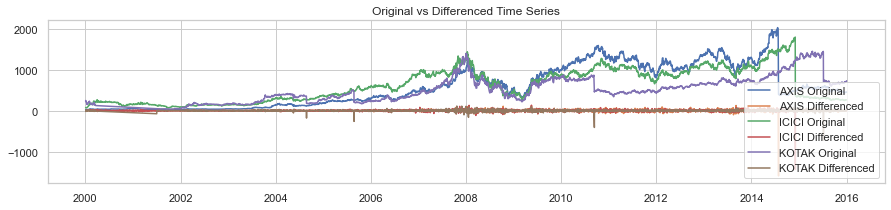

In [25]:
def plot_test(timeseries, label):
    plt.plot(timeseries, label=label)
    result = adfuller(timeseries)

plt.figure(figsize=(15, 3))
plot_test(axisDF2['Close'], 'AXIS Original')
plot_test(axisDF2['Close'].diff().dropna(), 'AXIS Differenced')

plot_test(iciciDF2['Close'], 'ICICI Original')
plot_test(iciciDF2['Close'].diff().dropna(), 'ICICI Differenced')

plot_test(kotakDF2['Close'], 'KOTAK Original')
plot_test(kotakDF2['Close'].diff().dropna(), 'KOTAK Differenced')

plt.title('Original vs Differenced Time Series')
plt.legend()
plt.show()

#### Now, we understand that p=1, q=2, and d=1 for all 3 datasets. We use these values to build the ARIMA Model:

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

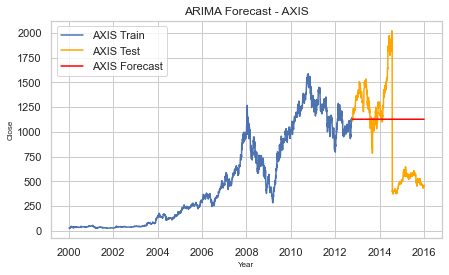

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt

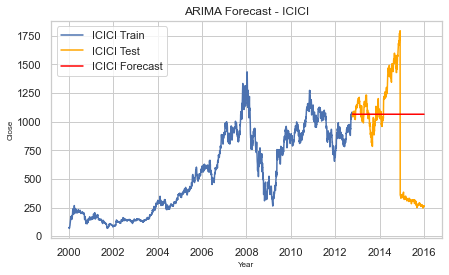

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

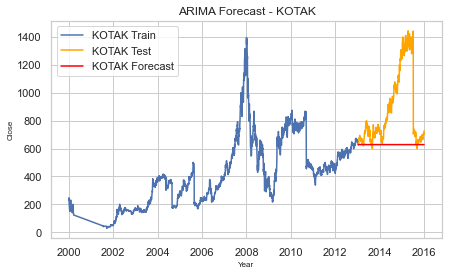

In [29]:
from statsmodels.tsa.arima.model import ARIMA

def forecast_arima(train, test, p, d, q, title):
    
    arma_model = ARIMA(train, order=(p, d, q))
    arma_fit = arma_model.fit()

    next_steps = len(test)
    arma_forecast = arma_fit.forecast(steps=next_steps)

    plt.figure(figsize=(7, 4))
    plt.plot(train.index, train, label=f'{title} Train')
    plt.plot(test.index, test, label=f'{title} Test', color='orange')
    plt.plot(test.index, arma_forecast, label=f'{title} Forecast', color='red')
    
    plt.xlabel('Year', fontsize=8)
    plt.ylabel('Close', fontsize=8)
    plt.legend()
    
    plt.title(f'ARIMA Forecast - {title}')

forecast_arima(axis_train, axis_test, p=2, d=1, q=1, title='AXIS')
plt.show()

forecast_arima(icici_train, icici_test, p=2, d=1, q=1, title='ICICI')
plt.show()

forecast_arima(kotak_train, kotak_test, p=2, d=1, q=1, title='KOTAK')
plt.show()

### 3. SARIMA model

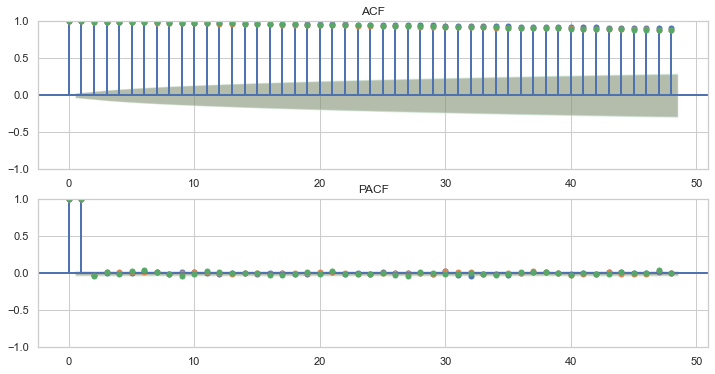

In [27]:
#finding the seasonal order
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plot_acf(axisDF2['Close'], lags=48, ax=plt.gca(), title='ACF')
plot_acf(iciciDF2['Close'], lags=48, ax=plt.gca(), title='ACF')
plot_acf(kotakDF2['Close'], lags=48, ax=plt.gca(), title='ACF')

plt.subplot(2, 1, 2)
plot_pacf(axisDF2['Close'], lags=48, ax=plt.gca(), title='PACF')
plot_pacf(iciciDF2['Close'], lags=48, ax=plt.gca(), title='PACF')
plot_pacf(kotakDF2['Close'], lags=48, ax=plt.gca(), title='PACF')

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

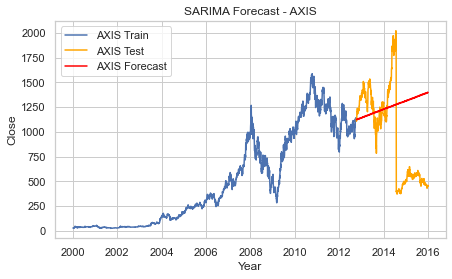

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.8/sit

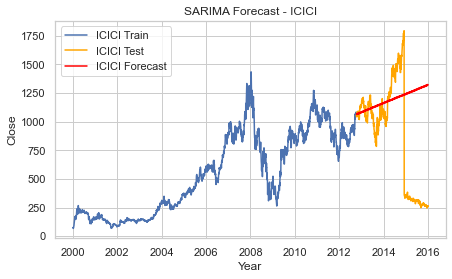

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anac

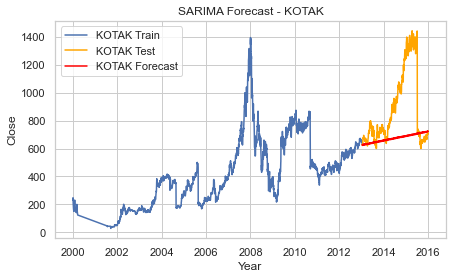

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def forecast_sarima(train, test, order, seasonal_order, title):
    
    sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    sarima_fit = sarima_model.fit(disp=False)

    next_steps = len(test)
    sarima_forecast = sarima_fit.get_forecast(steps=next_steps)

    plt.figure(figsize=(7, 4))
    plt.plot(train.index, train, label=f'{title} Train')
    plt.plot(test.index, test, label=f'{title} Test', color='orange')
    plt.plot(test.index, sarima_forecast.predicted_mean, label=f'{title} Forecast', color='red')
    
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Close', fontsize=12)
    plt.legend()
    
    plt.title(f'SARIMA Forecast - {title}')

order = (2, 1, 1)
seasonal_order = (1, 1, 1, 12) 

forecast_sarima(axis_train, axis_test, order, seasonal_order, title='AXIS')
plt.show()

forecast_sarima(icici_train, icici_test, order, seasonal_order, title='ICICI')
plt.show()

forecast_sarima(kotak_train, kotak_test, order, seasonal_order, title='KOTAK')
plt.show()